In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display_img(img,cmap=None):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)

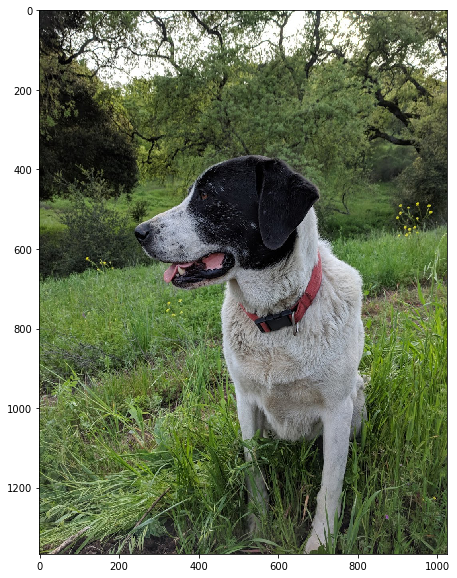

In [3]:
sammy = cv2.imread('course/DATA/sammy.jpg')
sammy = cv2.cvtColor(sammy, cv2.COLOR_BGR2RGB)

display_img(sammy)

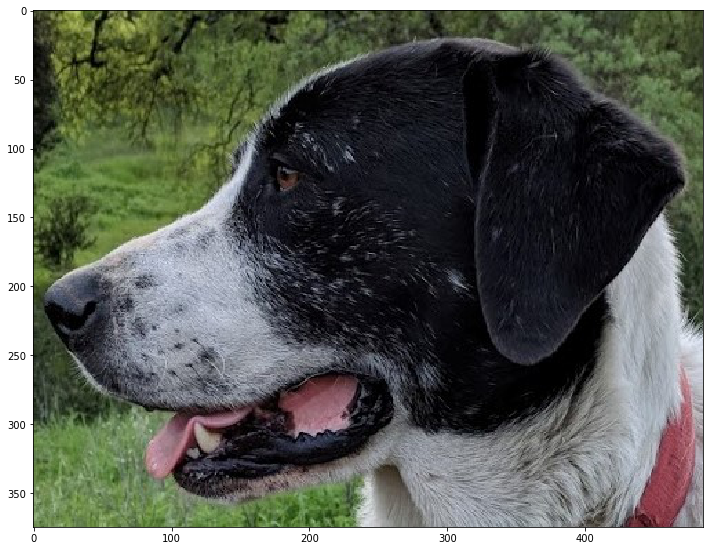

In [4]:
sammy_face = cv2.imread('course/DATA/sammy_face.jpg')
sammy_face = cv2.cvtColor(sammy_face, cv2.COLOR_BGR2RGB)

display_img(sammy_face)

In [5]:
methods = ['cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED']

(0, 10) (231, 345) (993, 540) (1367, 1025, 3) (375, 486, 3)


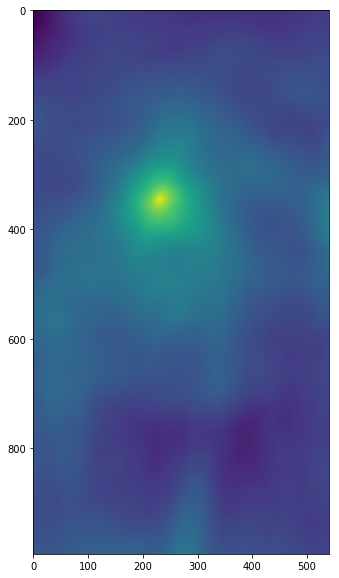

In [6]:
my_method = eval('cv2.TM_CCOEFF')
result = cv2.matchTemplate(sammy, sammy_face, my_method)

min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

print(min_loc, max_loc, result.shape, sammy.shape, sammy_face.shape)
display_img(result)

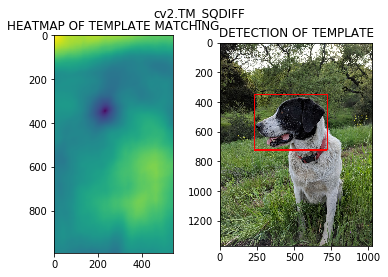

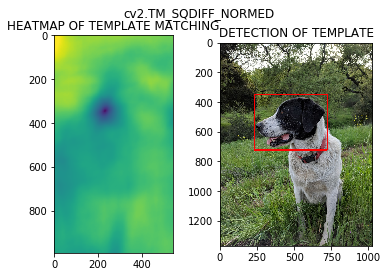

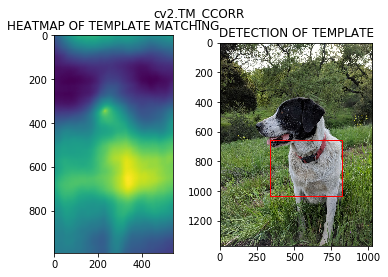

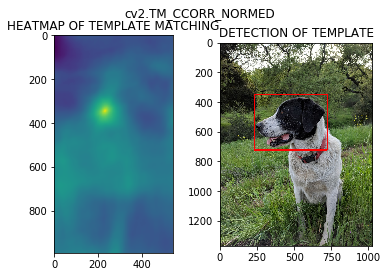

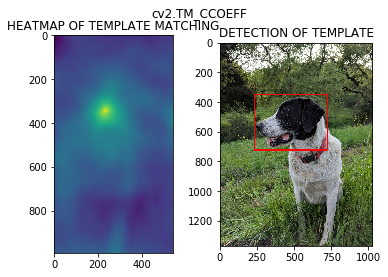

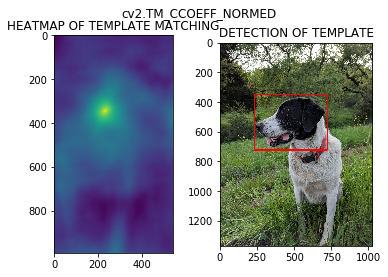

In [12]:
for method in methods:
    img = sammy.copy()
    
    method_name = method
    method = eval(method)
    result = cv2.matchTemplate(sammy, sammy_face, method)
    
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result) # (x, y)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
        
    height, width, channels = sammy_face.shape
    
    bottom_right = (top_left[0] + width, top_left[1] + height)
    
    cv2.rectangle(img, top_left, bottom_right, color=(255,0,0), thickness=5)
    
    plt.subplot(121)
    plt.imshow(result)
    plt.title('HEATMAP OF TEMPLATE MATCHING')
    
    plt.subplot(122)
    plt.imshow(img)
    plt.title('DETECTION OF TEMPLATE')
    plt.suptitle(method_name)
    
    plt.show()
